<a href="https://colab.research.google.com/github/aminecloud9/PFE/blob/main/NSLKDD_Originaldata_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

Download dataset

In [64]:
#data=pd.read_csv('/content/drive/MyDrive/CICIDS2017_multi_class_StandardScaler_NormalsationResults.csv')
#train_data = pd.read_csv('/content/drive/MyDrive/KDDTrain+.csv', header = None,nrows=1) # read just first line for columns
#columns = train_data.columns.tolist() # get the columns
#cols_to_use = columns[:len(columns)-1] 
train_data=pd.read_csv('/content/drive/MyDrive/KDDTrain+.csv',header=None)
train_data1=pd.read_csv('/content/drive/MyDrive/KDDTrain+.csv',header=None)
train_data = train_data.iloc[:, :-1]# drop the last one
test_data=pd.read_csv('/content/drive/MyDrive/KDDTest+.csv',header=None)
test_data = test_data.iloc[:, :-1]# drop the last one

Data nemerisation

In [65]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train_data[[1]] = enc.fit_transform(train_data[[1]])
test_data[[1]] = enc.fit_transform(test_data[[1]])

train_data[[2]] = enc.fit_transform(train_data[[2]])
test_data[[2]] = enc.fit_transform(test_data[[2]])

train_data[[3]] = enc.fit_transform(train_data[[3]])
test_data[[3]] = enc.fit_transform(test_data[[3]])

Data scaling

Train and test data formatting

In [66]:
train_X = train_data.values[:,:-1]
train_y = pd.factorize(train_data.values[:,-1])
test_X = test_data.values[:,:-1]
test_y = pd.factorize(test_data.values[:,-1])

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X=scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

In [75]:
train_X.shape

(125973, 41)

In [43]:
train_data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos,20
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,20


In [51]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,1.0,20.0,9.0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2.0,43.0,9.0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1.0,48.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,1.0,24.0,9.0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1.0,24.0,9.0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1.0,48.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos
125969,8,2.0,48.0,9.0,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,1.0,54.0,9.0,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,1.0,29.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos


In [ ]:
#Import Module
#from sklearn.model_selection import train_test_split


# train_X, test_X, train_y, test_y = train_test_split(X, y, 
#                                                     train_size=0.7,
#                                                     test_size=0.3,
#                                                     random_state=122)
# print("Labels for training and testing data")
# print(train_y)
# print(test_y)

In [76]:
# reshape input to be [samples, time steps, features]
import keras

#X_train = np.reshape(data.values[:,:-1].astype('float32'), (data.values[:,:-1].shape[0], 1, data.values[:,:-1].shape[1]))
X_train = np.reshape(train_X.astype('float32'), (train_X.shape[0], 1, train_X.shape[1]))
X_test = np.reshape(test_X.astype('float32'), (test_X.shape[0], 1, test_X.shape[1]))
#y_train = keras.utils.to_categorical(pd.factorize(data.values[:,77])[0],15)
y_train = keras.utils.to_categorical(train_y[0],5)
y_train = y_train.astype('int')
y_train = np.reshape(y_train,(y_train.shape[0],1,y_train.shape[1]))
y_test = keras.utils.to_categorical(test_y[0],5)
y_test = y_test.astype('int')
y_test = np.reshape(y_test,(y_test.shape[0],1,y_test.shape[1]))

Define the network

In [ ]:
# 1. define the network
import time
data_dim = X_train.shape[1]
timesteps = 1
num_classes = y_train.shape[1]
batch_size = 512


model = Sequential()
model.add(SimpleRNN(4, input_dim=X_train.shape[1]))  # try using a GRU instead, for fun
model.add(Dropout(0.2))
model.add(Dense(5))
model.add(Activation('softmax'))

In [ ]:
import time
data_dim = X_train.shape[1]
timesteps = 1
num_classes = y_train.shape[1]
batch_size = 1

model = Sequential()
model.add(LSTM(50, return_sequences=True, stateful=False, batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(Dropout(0.1))
model.add(LSTM(50, return_sequences=True, stateful=False))
model.add(Dropout(0.1))
model.add(LSTM(50, stateful=True))
model.add(Dropout(0.1))
model.add(Dense(15, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


start = time.time()

start_time = time.time()
model.fit(X_train, y_train,batch_size=batch_size, epochs=2, shuffle=False)
finish_time = time.time() - start_time
model.save("/content/drive/My Drive/final_model_NSL-KDD_brute_Multiclass.h5")

Epoch 1/2


ValueError: ignored

In [ ]:
import time
#train_object_num=len(train_data)
#print(test[0])
#model training
batch_size = 1024
model=Sequential()
model.add(LSTM(X_train.shape[1],input_dim=X_train.shape[2],return_sequences=True,kernel_initializer='uniform',activation='relu'))
model.add(LSTM(32,kernel_initializer='uniform',return_sequences=True,activation='relu'))
#model.add(LSTM(128,kernel_initializer='uniform',activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(y_train.shape[2],activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='NADAM',metrics=['accuracy'])
model.summary()
start_time = time.time()
history = model.fit(X_train,y_train,validation_split=.3,epochs=100,batch_size=batch_size,verbose=1)
finish_time = time.time() - start_time
#model.save("/content/drive/My Drive/model_NSL-KDD_42col_Multiclass_valsplit.3_bs1024_100ep.h5")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, None, 1)           172       
_________________________________________________________________
lstm_7 (LSTM)                (None, None, 32)          4352      
_________________________________________________________________
dense_2 (Dense)              (None, None, 256)         8448      
_________________________________________________________________
dense_3 (Dense)              (None, None, 128)         32896     
_________________________________________________________________
dense_4 (Dense)              (None, None, 64)          8256      
_________________________________________________________________
dense_5 (Dense)              (None, None, 16)          1040      
_________________________________________________________________
dense_6 (Dense)              (None, None, 5)          

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
loss, accuracy = model.evaluate(X_test,y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
y_pred = model.predict_classes(X_test)
target_names = ['Normal', 'Dos', 'Probe','R2L', 'U2R']
print(classification_report(y_true = np.transpose(test_y[0]), y_pred = y_pred))
#print(accuracy_score(y_true = np.transpose(test_y[0]), y_pred = y_pred))
print("execution time :  ",finish_time)

705/705 [==============================] - 1s 1ms/step - loss: 2.9198 - accuracy: 0.0749

Loss: 2.92, Accuracy: 7.49%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.09      0.16      0.12      7458
           1       0.05      0.03      0.03      9710
           2       0.72      0.07      0.14      2421
           3       0.01      0.01      0.01      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.07     22543
   macro avg       0.17      0.06      0.06     22543
weighted avg       0.13      0.07      0.07     22543

execution time :   191.17897701263428


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
test_y.sh

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
s= np.transpose(test_y[0])
s.shape

(22543,)

In [ ]:
y_pred.shape

(22543, 1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,  roc_auc_score, roc_curve
import sklearn.metrics as metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
score = model.evaluate(X_test, y_test, batch_size)
y_pred = model.predict(X_test, batch_size= batch_size)
y_pred = y_pred.astype('int')
#y_pred = [np.round(x) for x in y_pred]
#y_pred = np.array(y_pred)
y2 = np.array(test_y[0])

#print(y2)
print(classification_report(y_test,y_pred,"multiclass"))
cm = confusion_matrix(y2.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)


probs = model.predict_proba(X_test,batch_size=batch_size)
#y_preds = np.transpose([pred[:, 1] for pred in probs])
#y_preds=y_preds.reshape(1,-1)
fpr, tpr, threshold = metrics.roc_auc_score(y_score==np.transpose(y_test),y_true= np.transpose(probs),multi_class='ovo')
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#checkpointer = callbacks.ModelCheckpoint(filepath="kddresults/lstm1layer/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
#csv_logger = CSVLogger('training_set.csv',separator=',', append=False)
start_time = time.time()
model.fit(X_train, y_train, batch_size=batch_size, epochs=2, validation_split=.2)#,callbacks=[checkpointer,csv_logger]
finish_time = time.time() - start_time


In [ ]:
#saving model
model.save("/content/drive/MyDrive/NSL-KDD_42norm_results_5Dense_po_Dropout_200epoch_1024batch_model.h5")

In [ ]:
from keras.models import load_model
#model = load_model('/content/drive/MyDrive/NSL-KDD_results_SimpleRNN_model.hdf5')
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

#print("--- %s seconds ---",finish_time)
y_pred = model.predict_classes(X_train)
#np.savetxt('/content/drive/MyDrive/NSL-KDD_results_SimpleRNN_predicted.txt', np.transpose([y_test,y_pred]), fmt='%s')

705/705 [==============================] - 4s 6ms/step - loss: 19.9034 - accuracy: 0.0648

Loss: 19.90, Accuracy: 6.48%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(y_train)
y_pred

[[[1 0 0 0 0]]

 [[1 0 0 0 0]]

 [[0 1 0 0 0]]

 ...

 [[1 0 0 0 0]]

 [[0 1 0 0 0]]

 [[1 0 0 0 0]]]


array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
42 col pca 80% : b_s=256 epochs= 300 Lstm(32,32)->Dense(256,128,64,ytrain.shape(2))   ->   accuracy = 62.8%


24 col normalisé : b_s=1024 epochs= 100 Lstm(32,32)->Dense(256,128,64,16,ytrain.shape(2))   ->   accuracy = 83.73%
24 col pca 80% : b_s=1024 epochs= 100 Lstm(32,32)->Dense(256,128,64,16,ytrain.shape(2))   ->   accuracy = 40.28%
42 col normalisé : b_s=1024 epochs= 100 Lstm(32,32)->Dense(256,128,64,16,ytrain.shape(2))   ->   accuracy = 48.52%
42 col pca 80% : b_s=1024 epochs= 100 Lstm(32,32)->Dense(256,128,64,16,ytrain.shape(2))   ->   accuracy = 45.22%


In [ ]:
batch_size= 1024
lrate = 0.1
model = Sequential()
model.add(Dense(X_train.shape[2], input_dim=X_train.shape[2], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1024, input_dim=X_train.shape[2], activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.1))
model.add(Dense(768, input_dim=X_train.shape[2], activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.1))
model.add(Dense(512, input_dim=X_train.shape[2], activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.1))
model.add(Dense(256, input_dim=X_train.shape[2], activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.1))
model.add(Dense(128, input_dim=X_train.shape[2], activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.1))
model.add(Dense(y_train.shape[2], activation='softmax'))
	# compile model
opt = SGD(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(X_train, y_train, validation_split=.3,batch_size=batch_size, epochs=200, verbose=1)

Epoch 1/200
87/87 [==============================] - 18s 194ms/step - loss: 0.8727 - accuracy: 0.8605 - val_loss: 0.0832 - val_accuracy: 0.9771
Epoch 2/200
87/87 [==============================] - 16s 188ms/step - loss: 0.0694 - accuracy: 0.9800 - val_loss: 0.0556 - val_accuracy: 0.9824
Epoch 3/200
87/87 [==============================] - 16s 188ms/step - loss: 0.0599 - accuracy: 0.9823 - val_loss: 0.0660 - val_accuracy: 0.9801
Epoch 4/200
87/87 [==============================] - 16s 186ms/step - loss: 0.0516 - accuracy: 0.9846 - val_loss: 0.0357 - val_accuracy: 0.9906
Epoch 5/200
87/87 [==============================] - 16s 186ms/step - loss: 0.0311 - accuracy: 0.9907 - val_loss: 0.0344 - val_accuracy: 0.9902
Epoch 6/200
87/87 [==============================] - 16s 188ms/step - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.0328 - val_accuracy: 0.9907
Epoch 7/200
48/87 [===============>..............] - ETA: 6s - loss: 0.0274 - accuracy: 0.9917

Text(0.5, 1.0, 'lrate=0.1')

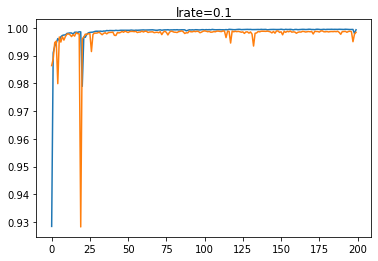

In [ ]:
from matplotlib import pyplot
# plot accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.title('lrate='+str(lrate), pad=-50)


Text(0.5, 1.0, 'lrate=0.1')

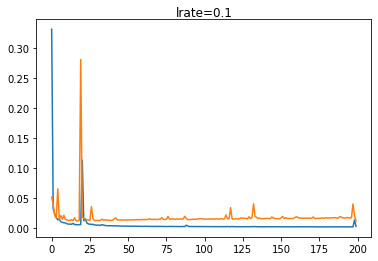

In [ ]:

# plot leoss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title('lrate='+str(lrate), pad=-50)